
# Prediction of purchase

In this notebbok we will try to predict wheterer a purchase would be made based on features like the gender, salary, age.

We will be working on the social media network dataset:  
https://www.kaggle.com/datasets/rakeshrau/social-network-ads

## SVM (Support Vector Machines)  

In this notebook we will use SVM model.  

### Support Vectors  

Support vectors are the data points that are crucial for defining the decision boundary between different classes. These are the data points that lie closest to the decision boundary, and they play a key role in determining the optimal separation between classes.
Support vectors essentially support the decision boundary or hyperplane and have a significant influence on the SVM's performance.  

### Support Vector Machines  

SVM is a supervised machine learning algorithm designed for classification and regression tasks. The primary objective of SVM is to find the hyperplane that best separates the data into different classes in feature space. The hyperplane chosen is the one that maximizes the margin, which is the distance between the hyperplane and the nearest data points from each class (support vectors). SVM can handle linear and non-linear decision boundries and also works in high-dimentional spaces

## Table of Contents

1. [Load Data Set](#load-data-set)
2. [Inspect Data](#inspect-data)
3. [Preprocessing and Cleaning](#preprocessing-and-cleaning)
4. [EDA (Exploratory Data Analysis)](#eda)
5. [Encoding](#encoding)
6. [Scaling](#Scaling)
7. [Build Model](#build-model)
8. [Tune Hyperparameters - Grid Search](#tune-hyperparameters---grid-search)
9. [Evaluate Model](#evaluate-model)

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## 1. [Load Data Set](#load-data-set)

In [2]:
relative_path = 'Social_Network_Ads.csv'
file_path = os.path.join(os.getcwd(), relative_path)

df = pd.read_csv(file_path)

## 2. [Inspect Data](#inspect-data)

In [3]:
df.shape

(400, 5)

In [4]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
def inspect(df):
    if isinstance(df, pd.DataFrame):
        total_na = df.isna().sum().sum()
        print("Dimensions : %d rows, %d columns" % (df.shape[0], df.shape[1]))
        print("Total NA Values : %d " % (total_na))
        print("%38s %10s     %10s %10s" % ("Column Name", "Data Type", "#Distinct", "NA Values"))
        col_name = df.columns
        dtyp = df.dtypes
        uniq = df.nunique()
        na_val = df.isna().sum()
        for i in range(len(df.columns)):
            print("%38s %10s   %10s %10s" % (col_name[i], dtyp[i], uniq[i], na_val[i]))
        
    else:
        print("Expect a DataFrame but got a %15s" % (type(df)))

In [6]:
inspect(df)

Dimensions : 400 rows, 5 columns
Total NA Values : 0 
                           Column Name  Data Type      #Distinct  NA Values
                               User ID      int64          400          0
                                Gender     object            2          0
                                   Age      int64           43          0
                       EstimatedSalary      int64          117          0
                             Purchased      int64            2          0


/var/folders/l_/sd90yz351sn2j7ttw4wtv_7h0000gn/T/ipykernel_2279/1613403811.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("%38s %10s   %10s %10s" % (col_name[i], dtyp[i], uniq[i], na_val[i]))


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
User ID,400.0,1.569154e+07,71658.321581,15566689.0,15626763.75,15694341.5,15750363.0,15815236.0
Age,400.0,3.765500e+01,10.482877,18.0,29.75,37.0,46.0,60.0
EstimatedSalary,400.0,6.974250e+04,34096.960282,15000.0,43000.00,70000.0,88000.0,150000.0
Purchased,400.0,3.575000e-01,0.479864,0.0,0.00,0.0,1.0,1.0


## 3. [Preprocessing and Cleaning](#preprocessing-and-cleaning)

In [8]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [9]:
df.drop('User ID', axis=1)

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


## 4. [EDA (Exploratory Data Analysis)](#eda)

<Figure size 1000x300 with 0 Axes>

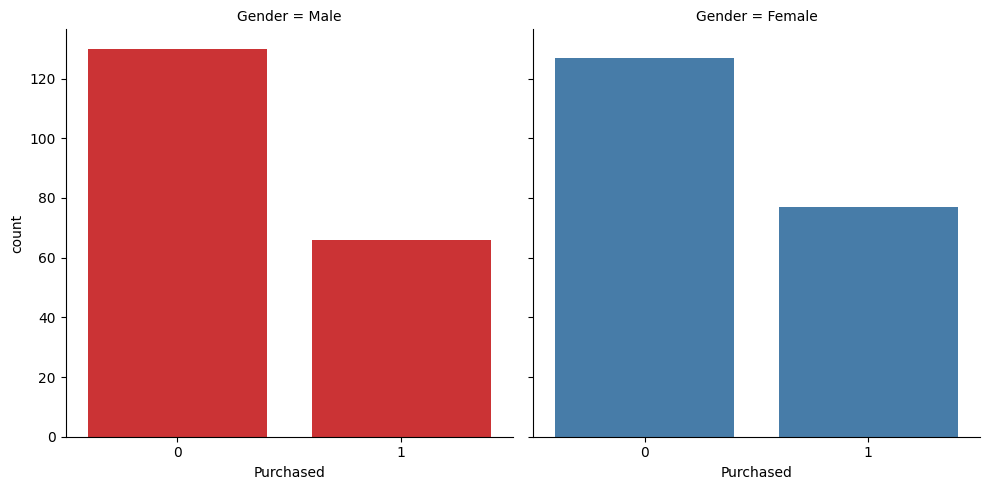

In [10]:
plt.figure(figsize=(10, 3))
sns.catplot(x='Purchased', hue='Gender', col='Gender', kind='count', data=df, palette="Set1", legend=False)
plt.show()

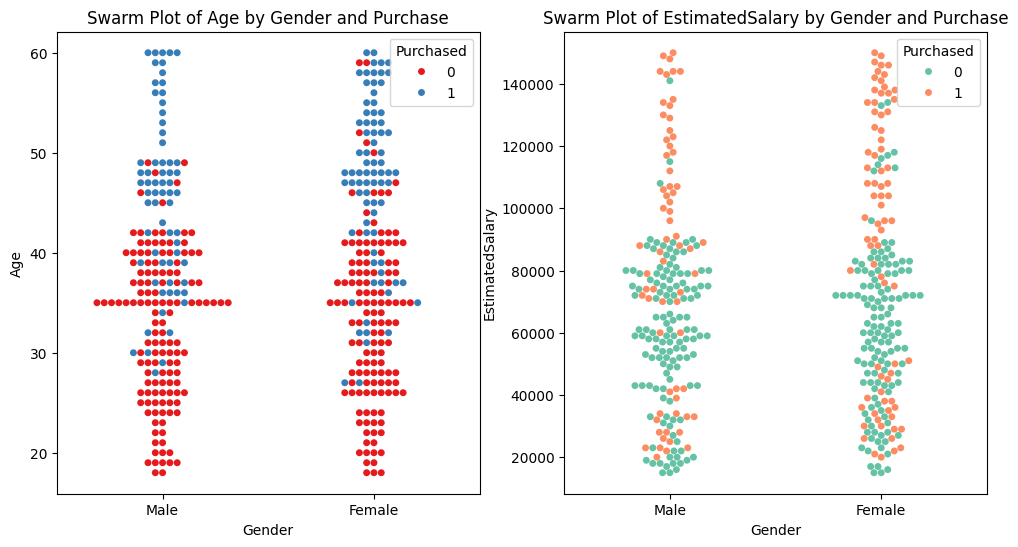

In [11]:
# Swarm plot
plt.figure(figsize=(12, 6))

# Age Swarm Plot
plt.subplot(1, 2, 1)
sns.swarmplot(x='Gender', y='Age', hue='Purchased', data=df, palette='Set1')
plt.title('Swarm Plot of Age by Gender and Purchase')

# EstimatedSalary Swarm Plot
plt.subplot(1, 2, 2)
sns.swarmplot(x='Gender', y='EstimatedSalary', hue='Purchased', data=df, palette='Set2')
plt.title('Swarm Plot of EstimatedSalary by Gender and Purchase')

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


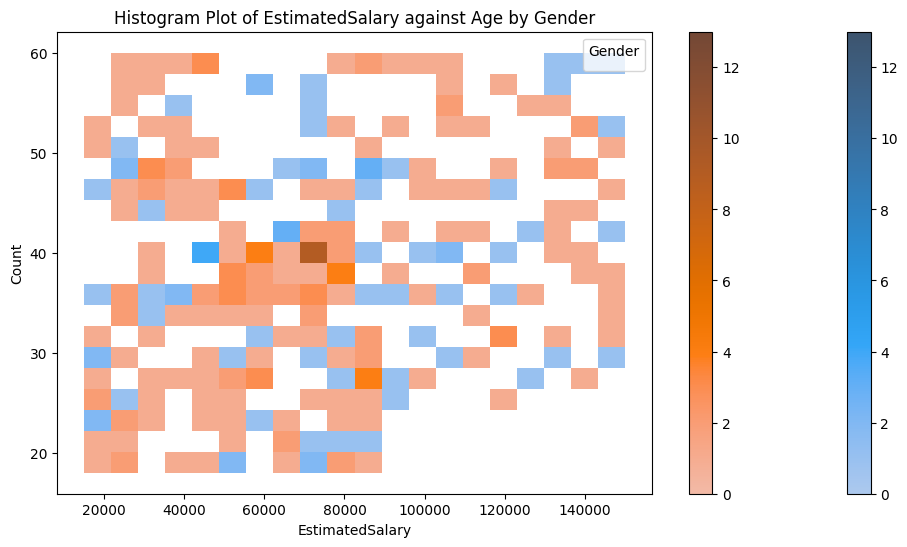

In [12]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='EstimatedSalary', y='Age', hue='Gender', bins=20, cbar=True)
plt.title('Histogram Plot of EstimatedSalary against Age by Gender')
plt.xlabel('EstimatedSalary')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

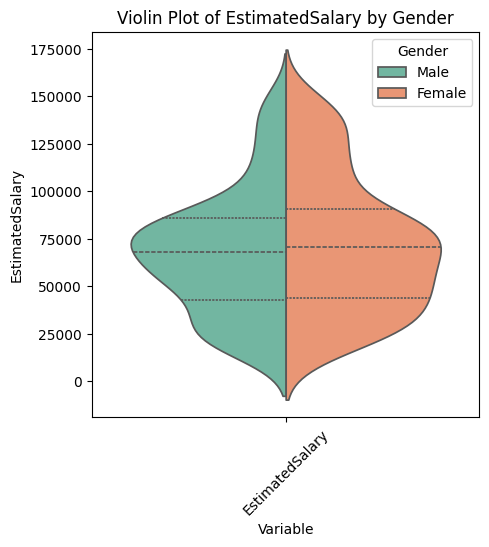

In [13]:
# Melt the DataFrame to create long-form data
melted_df = pd.melt(df, id_vars=['Purchased', 'Gender'], value_vars=['EstimatedSalary'], var_name='Variable', value_name='Value')

# Violin plot with 'Male' and 'Female' on the same picture
plt.figure(figsize=(5, 5))
sns.violinplot(x='Variable', y='Value', hue='Gender', data=melted_df, palette='Set2', inner='quartile', split=True)
plt.title('Violin Plot of EstimatedSalary by Gender')
plt.xlabel('Variable')
plt.ylabel('EstimatedSalary')
plt.legend(title='Gender')
plt.xticks(rotation=45)
plt.show()

## 5. [Encoding](#encoding)

In [14]:
df['Gender'].unique()
df['Gender'].value_counts()

Gender
Female    204
Male      196
Name: count, dtype: int64

In [15]:
gender_mapping = {'Female': 0, 'Male': 1}
df['Gender'] = df['Gender'].str.strip().map(gender_mapping)

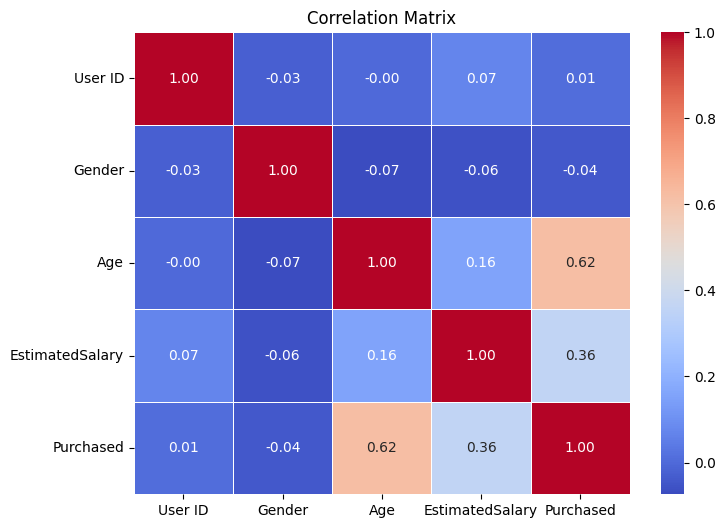

In [16]:
correlation_matrix = df.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [17]:
cor_target = abs(correlation_matrix["Purchased"])

relevant_features = cor_target
relevant_features.sort_values(ascending=False)

Purchased          1.000000
Age                0.622454
EstimatedSalary    0.362083
Gender             0.042469
User ID            0.007120
Name: Purchased, dtype: float64

## 6. [Scaling](#Scaling)

In [18]:
scaler = StandardScaler()

X = df.drop('Purchased', axis=1)
X = scaler.fit_transform(X)

y = df['Purchased']

## 8. [Tune Hyperparameters - Grid Search](#tune-hyperparameters---grid-search)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [20]:
svm_model = SVC()

# Define the parameter grid to search
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.01, 0.1, 1]
}

# Create a grid search object
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


## 7. [Build Model](#build-model)

In [21]:
print(best_params)

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


In [22]:
model = SVC()

svm_model = SVC(C=best_params['C'], kernel=best_params['kernel'], gamma=best_params['gamma'])

# Train the model on the training data
svm_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_model.predict(X_test)

## 9. [Evaluate Model](#evaluate-model)

In [23]:
# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy score: {accuracy}')

# Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

Accuracy score: 0.94
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95        63
           1       0.90      0.95      0.92        37

    accuracy                           0.94       100
   macro avg       0.93      0.94      0.94       100
weighted avg       0.94      0.94      0.94       100


Confusion Matrix:
[[59  4]
 [ 2 35]]
